In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
from soccerplots.radar_chart import Radar
from mplsoccer import FontManager
import matplotlib as mpl

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


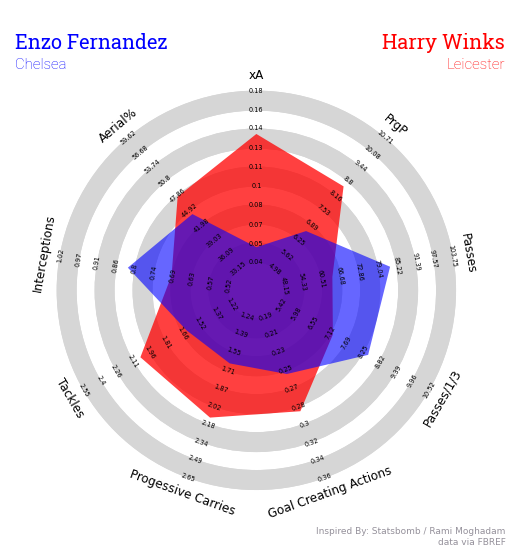

In [16]:
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)


# Sample data
data = {
    'Player': ['Enzo Fernandez', 'Harry Winks'],
    #'xG': [12.5, 11.8, 8.7, 8.3, 4.5, 5.0],
    'xA': [0.14,0.05],
    'PrgP': [8.57,6.64],
    'Passes': [64.2,83],
    'Passes/1/3': [7.22,8.42],
    'Goal Creating Actions': [0.29,0.25],
    'Progessive Carries': [2.12,1.65],
    'Tackles': [2.04,1.63],
    'Interceptions': [0.69,0.82],
    'Aerial%': [47.7,44.2]
}

df = pd.DataFrame(data)
params = list(df.columns)
params = params[1:]

ranges = []
a_values = []
b_values = []

for x in params:
    a= min(df[params][x])
    a = a - (a*.25)
    
    b= max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))

for x in range(len(df['Player'])):
    if df['Player'][x] == 'Enzo Fernandez':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Harry Winks':
        b_values = df.iloc[x].values.tolist() 
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

title = dict(
    title_name='Enzo Fernandez',
    title_color = 'red',
    subtitle_name = 'Chelsea',
    subtitle_color = 'red',
    title_name2='Harry Winks',
    title_color2 = 'blue',
    subtitle_name2 = 'Leicester',
    subtitle_color2 = 'blue',
    title_fontsize = 12,
    subtitle_fontsize =8
)

endnote = 'data via FBREF'

radar = Radar(fontfamily="Liberation Serif",
    label_fontsize=12)

#fig = plt.figure(figsize=(8,8))
fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['red','blue'],
                         alphas=[.75,.6],endnote=endnote,
                         compare=True,figsize=(8,8))

title1_text = fig.text(0.345, 0.83, 'Enzo Fernandez', color='blue', ha='left', va='center', fontproperties=robotto_bold.prop,fontsize=20)
title2_text = fig.text(0.345, 0.80, 'Chelsea', color='blue', ha='left', va='center', fontproperties=robotto_thin.prop,fontsize=15)
title3_text = fig.text(0.685, 0.83, 'Harry Winks',color='red', ha='right', va='center', fontproperties=robotto_bold.prop,fontsize=20)
title4_text = fig.text(0.685, 0.80, 'Leicester', color='red', ha='right', va='center', fontproperties=robotto_thin.prop,fontsize=15)

plt.show()